In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [14]:
# 1.1 Crosstab Analysis
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)
sorted_crosstab = crosstab_prop.sort_values(by=True, ascending=False)

print(sorted_crosstab)

isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [15]:
#1.2 Statistical Tests

#Chi test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(crosstab)

print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 36540.20270061387, p-value: 0.0


In [16]:
#Cramer's V test
cramers_v = np.sqrt(chi2 / (crosstab.sum().sum() * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


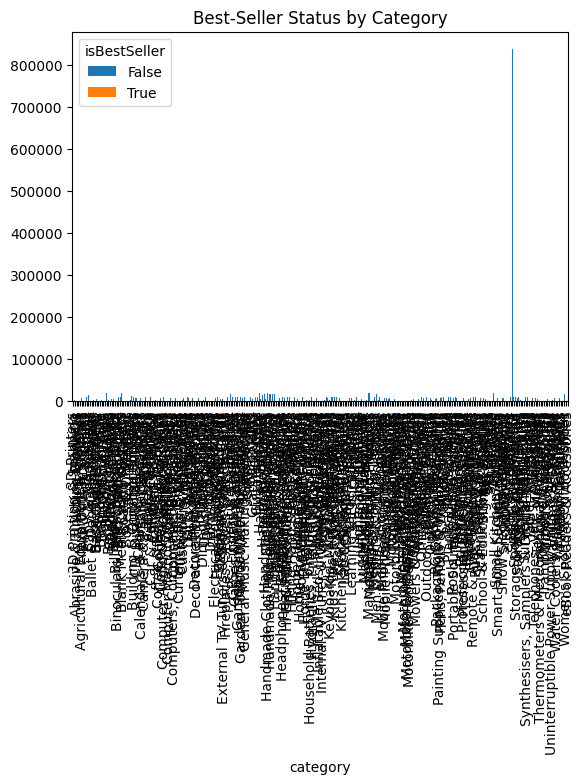

In [22]:
#1.3 Visualizations
crosstab.plot(kind='bar', stacked=True)
plt.title('Best-Seller Status by Category')
plt.show()

In [24]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#2.1 Preliminary Step: Remove Outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

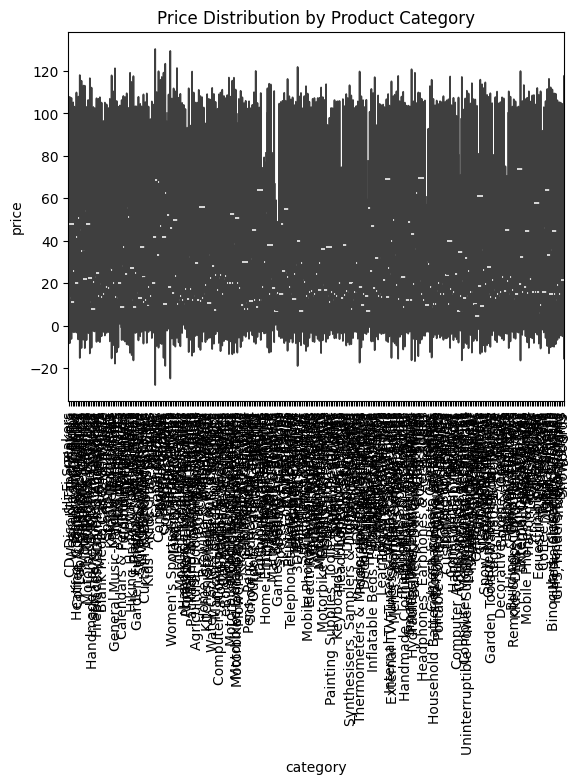

In [26]:
#2.2 Violin Plots

import seaborn as sns

sns.violinplot(x='category', y='price', data=df_no_outliers)
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=90)
plt.show()

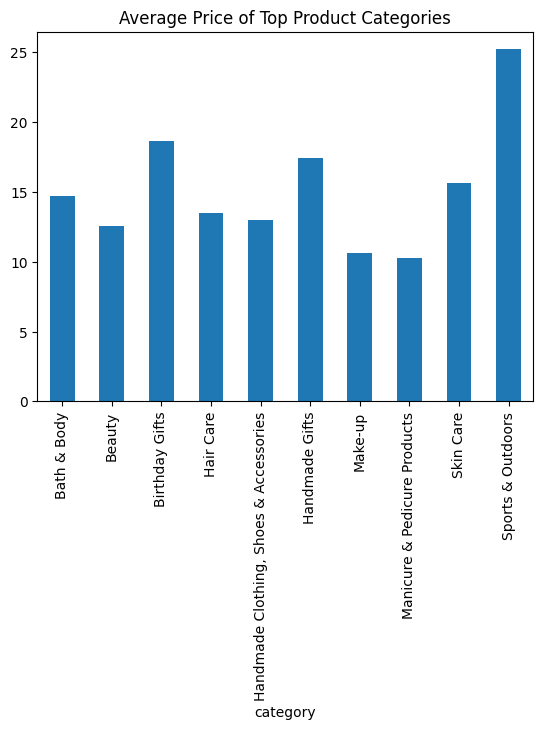

In [28]:
#2.3 Bar Charts
top_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)].groupby('category')['price'].mean()

avg_price_top_categories.plot(kind='bar')
plt.title('Average Price of Top Product Categories')
plt.show()

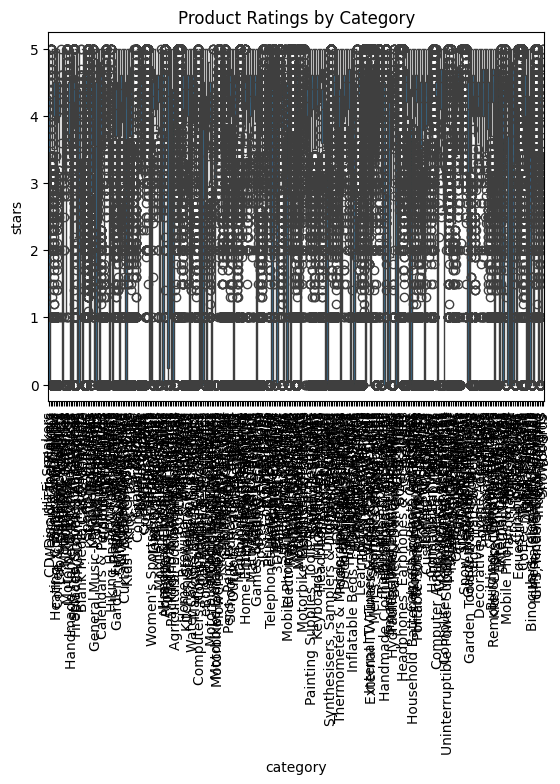

In [34]:
#2.4 Box Plots

sns.boxplot(x='category', y='stars', data=df_no_outliers)
plt.title('Product Ratings by Category')
plt.xticks(rotation=90)
plt.show()

In [38]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings

#3.1 Correlation Coefficients
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation between price and rating: {correlation}")

Correlation between price and rating: -0.07767299878181352


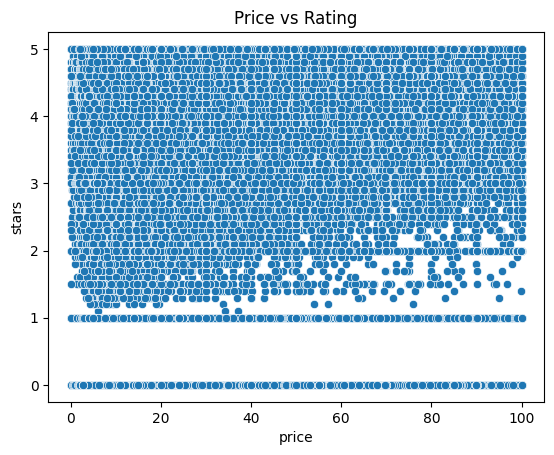

In [40]:
#3.2 Visualizations

sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.title('Price vs Rating')
plt.show()

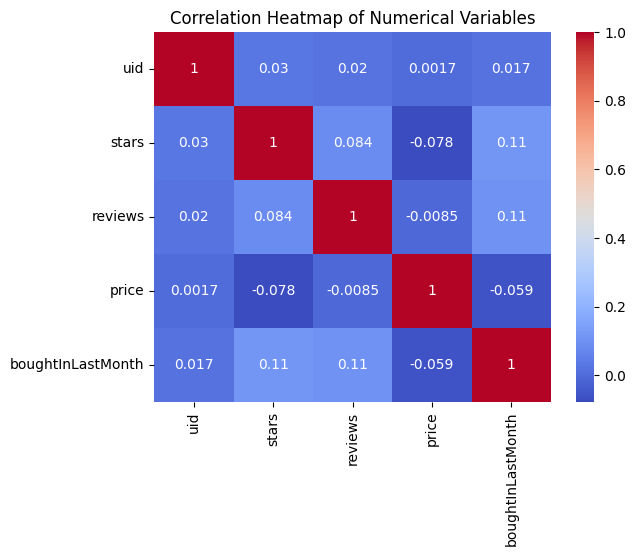

In [48]:
# Selecciona solo las columnas numéricas
numerical_df = df_no_outliers.select_dtypes(include=['number'])

# Generar un heatmap de correlación
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()